<a href="https://colab.research.google.com/github/sattar-iust/sattar-iust/blob/main/Deep_Inside_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of IMDB data set

In [4]:
import glob
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import math
import missingno as msno

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


Since I use google colab and google drive, I have mounted my google drive and then read the excel file into a data frame.

In [6]:
df_imdb = pd.read_excel ('/content/drive/MyDrive/IMDB_Files/IMDB.xlsx')


As we can see, this data set consists of 25293 observations, or information of 25293 movies which have been grabbed from IMDB web site, as well as 16 features (columns). 

In [7]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25293 entries, 0 to 25292
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               25293 non-null  object 
 1   title              25293 non-null  object 
 2   year               25293 non-null  int64  
 3   runtime            25273 non-null  float64
 4   genre              25293 non-null  object 
 5   globalRate         25293 non-null  float64
 6   text               25293 non-null  object 
 7   votes              25293 non-null  int64  
 8   stars              25285 non-null  object 
 9   creator            25285 non-null  object 
 10  story_line         20094 non-null  object 
 11  tag_line           16889 non-null  object 
 12  country_of_origin  7081 non-null   object 
 13  language           5612 non-null   object 
 14  color              10350 non-null  object 
 15  sound_mix          7019 non-null   object 
dtypes: float64(2), int64(2

In [8]:
df_imdb.head()

,link,title,year,runtime,genre,globalRate,text,votes,stars,creator,story_line,tag_line,country_of_origin,language,color,sound_mix
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",Georges Méliès,An association of astronomers has convened to ...,NaN,NaN,NaN,Black and White,Silent
1,/title/tt0004052/?ref_=adv_li_tt,The Hazards of Helen,1914,NaN,Action,7.0,"Helen, informed of the danger which menaces an...",108,"Helen Holmes, Helen Gibson, J.P. McGowan, Ethe...","J. Gunnis Davis, J.P. McGowan, Robert G. Vignola",NaN,NaN,NaN,NaN,NaN,NaN
2,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Louis J. Gasnier, Donald MacKenzie",Young Pauline is left a lot of money when her ...,"The Eclectic Film Company's Great $25,000 Priz...",NaN,NaN,Black and White,Silent
3,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",Louis Feuillade,NaN,NaN,NaN,NaN,NaN,NaN
4,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,"Francis, a young man, recalls in his memory th...","The most amazing story ever screened. , ...",Germany,German,NaN,NaN


Now, I'm going to gain some insights of this data set via visualiztion.
## survey on numerical features
There are several numerical columns in the data set such as runtime, votes, global rate, and year.
A good starting point could be looking at these numerical features and ploting their histograms and distributions.
So, I will begin with run time!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'runtime (min)'), Text(0.5, 1.0, 'Box plot of run time')]

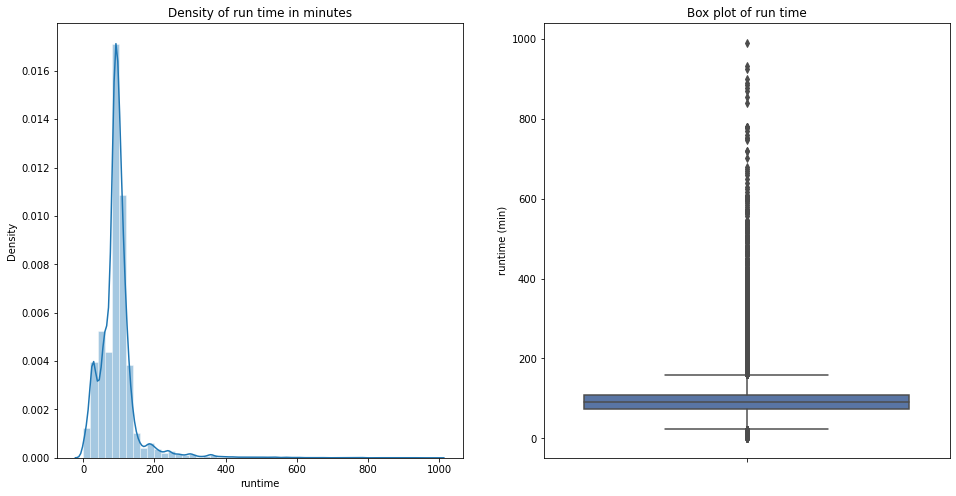

In [9]:
# run time
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
ax = sns.distplot(df_imdb['runtime'], ax=axes[0])
ax.set(title='Density of run time in minutes')
ax = sns.boxplot(y=df_imdb['runtime'], ax=axes[1])
ax.set(title='Box plot of run time', ylabel='runtime (min)')

As you can see in the above digrams, most movies' duration are less than 400 minutes, although there are some really long movies which may last near 1000 minutes. Regarding Box plot diagram, we can consider those movies which last more than 200 minutes as outliers, while in this context outlier is somehow meaningless because they are movies and really exist! 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'number of votes'), Text(0.5, 1.0, 'Box plot of votes')]

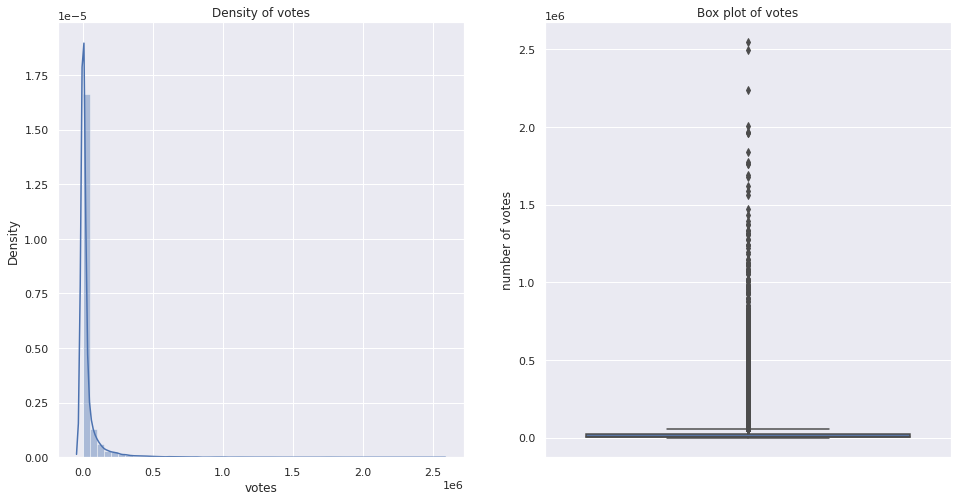

In [10]:
# votes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
ax = sns.distplot(df_imdb['votes'], ax=axes[0])
ax.set(title='Density of votes')
ax = sns.boxplot(y=df_imdb['votes'], ax=axes[1])
ax.set(title='Box plot of votes', ylabel='number of votes')

These plots depict that majority of votes is less than 100000 votes and there are a few movies which more than one million users voted on them. The same findings can be visible over Boxplot diagram. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    25293.000000
mean         6.444127
std          1.251144
min          1.000000
25%          5.800000
50%          6.600000
75%          7.300000
max          9.900000
Name: globalRate, dtype: float64

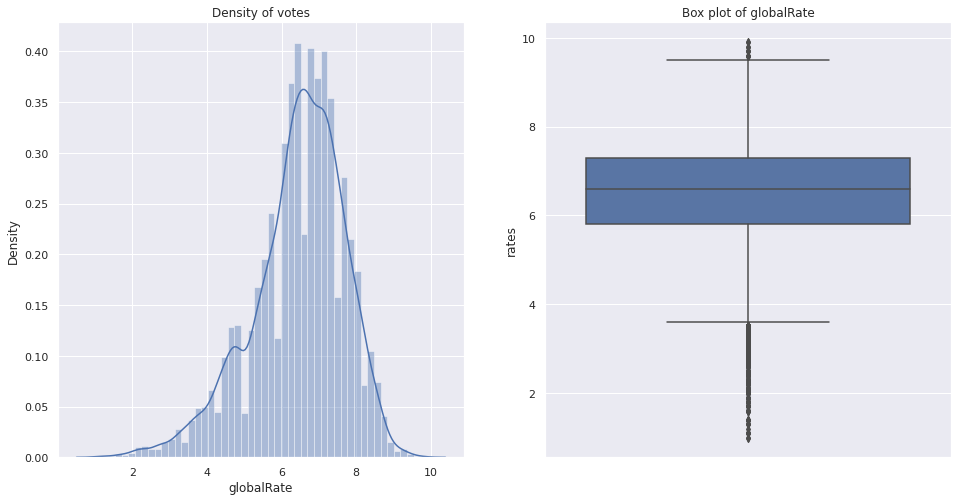

In [11]:
# globalRate
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
ax = sns.distplot(df_imdb['globalRate'], ax=axes[0])
ax.set(title='Density of votes')
ax = sns.boxplot(y=df_imdb['globalRate'], ax=axes[1])
ax.set(title='Box plot of globalRate', ylabel='rates')
df_imdb['globalRate'].describe()

It seems globalRate is nearly normally distributed around 6.5 with standard deviation of 1.25 and as our expectation seeing rates less than 2 or more than 9 is somehow rare. Moreover, we are aware that range of globale rate is between 0.0 and 10.0.

## Survey on Genre
After investigation of numerical columns, I would like to deal with other non-numerical features. One of the important features which we have in our data set is genre. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


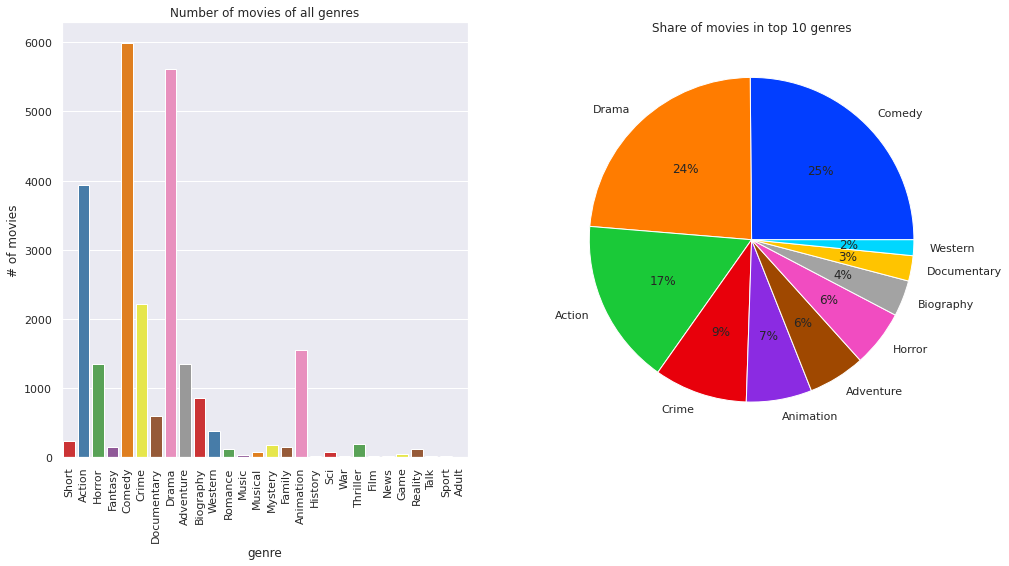

In [12]:
# how many movies are in each genre 
df_count = (df_imdb.groupby('genre', axis=0).count())[['title']]
#df = df.nlargest(10, 'title')
colors = sns.color_palette('bright')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
#ax = sns.barplot(x = df.index, y=df['title'], data=df, ax=axes[0])
ax = sns.countplot(data=df_imdb, x='genre', palette='Set1', color=colors, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Number of movies of all genres', ylabel='# of movies')
axes[1].pie(df_count.nlargest(10, 'title'), labels=(df_count.nlargest(10, 'title')).index, colors = colors, autopct = '%0.0f%%')
axes[1].set(title='Share of movies in top 10 genres')
plt.show()

According to barchart, majority of movies are of three genres: comediy, drama, and action. The pie chart shows the percentage of movies based on genre with respect to top 10 genres.

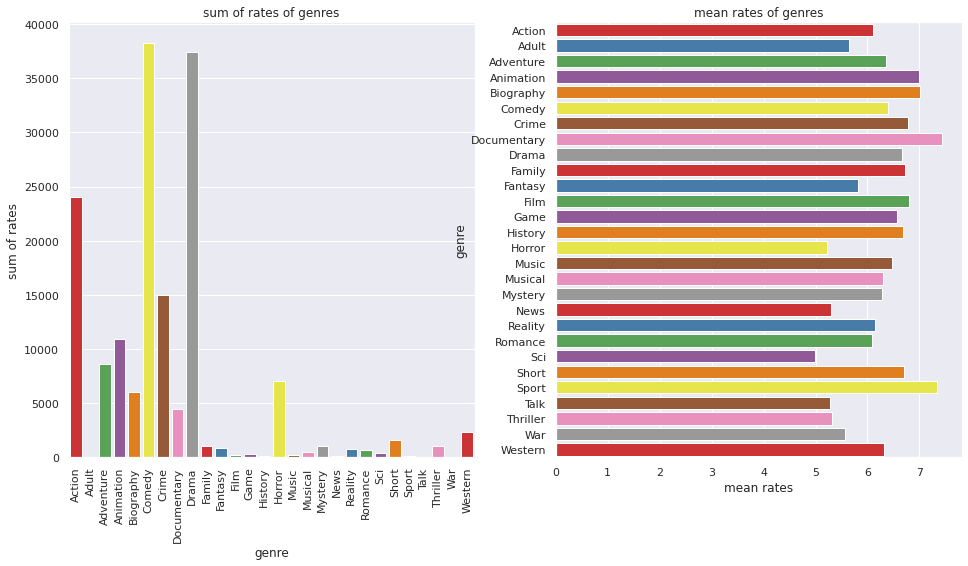

In [13]:
# globalRate and genre
# which genre is more popular regarding globalrate 
df_rate = df_imdb.groupby('genre', axis=0).agg({'globalRate':sum})
#df = df.nlargest(10, 'globalRate')
colors = sns.color_palette('bright')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
#ax = sns.barplot(x = df.index, y=df['title'], data=df, ax=axes[0])
ax = sns.barplot(data=df_rate, x=df_rate.index, y=df_rate['globalRate'], palette='Set1', ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='sum of rates of genres', ylabel='sum of rates')
# merge two data frames and normalize the rates through dividing by counts
# that is mean of rates!
df_cr = df_count.join(df_rate)
df_cr['rateNorm'] = df_cr['globalRate']/df_cr['title'] 
ax = sns.barplot(data=df_cr, y=df_cr.index, x=df_cr['rateNorm'], palette='Set1', ax=axes[1])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='mean rates of genres', xlabel='mean rates')
plt.show()

Normalization of global rate column (i.e. calcualtion of mean of rates that is sum of rates at each genre is divided by count of that genre) reveals more information that merely sum of rates. For instance, despite the fact that Comedy and Drama movies have the maximum amount of rates, Documentary and sport genres are the two genres which have the maximum means!

In [14]:
df_cr['rateNorm'].describe()

count    28.000000
mean      6.260548
std       0.658496
min       4.998718
25%       5.777911
50%       6.343148
75%       6.705832
max       7.437604
Name: rateNorm, dtype: float64

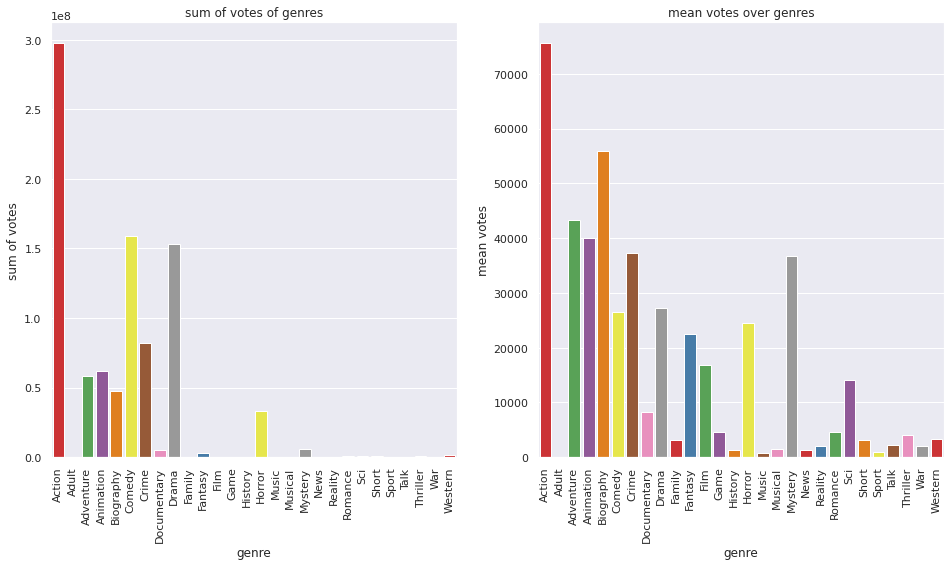

In [15]:
# globalRate and votes
# how many users votes on each genre!
df_vote = df_imdb.groupby('genre', axis=0).agg({'votes':sum})
colors = sns.color_palette('bright')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_theme(style="darkgrid")
#ax = sns.barplot(x = df.index, y=df['title'], data=df, ax=axes[0])
ax = sns.barplot(data=df_vote, x=df_vote.index, y=df_vote['votes'], palette='Set1', ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='sum of votes of genres', ylabel='sum of votes')
# merge two data frames and normalize the rates through dividing by counts
# that is mean of rates!
df_cr = df_vote.join(df_cr)
df_cr['voteNorm'] = df_cr['votes']/df_cr['title'] 
ax = sns.barplot(data=df_cr, x=df_cr.index, y=df_cr['voteNorm'], palette='Set1', ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='mean votes over genres', ylabel='mean votes')
plt.show()


## Survey on year

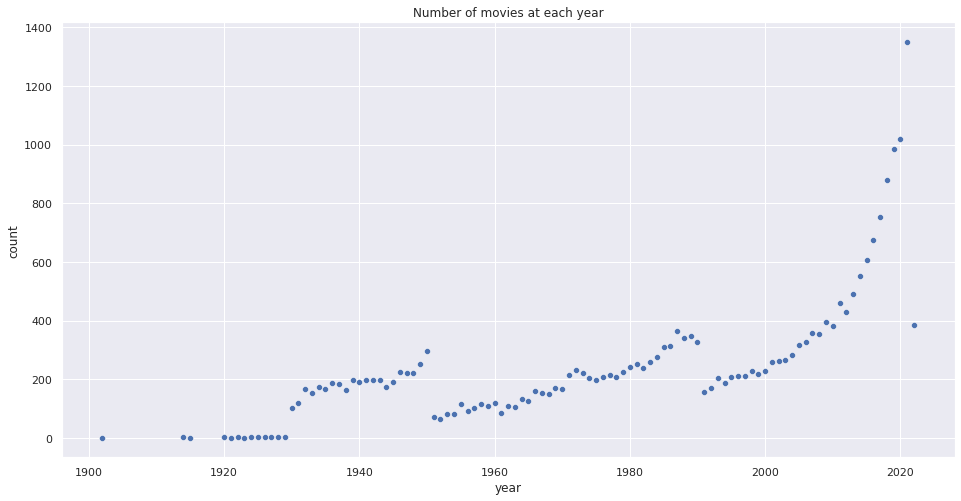

In [16]:
# how many movies were produced each year
df_year = (df_imdb.groupby('year', axis=0).count())[['title']]
#df_year = df_year.reset_index()
#df = df.nlargest(10, 'title')
colors = sns.color_palette('bright')
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.set_theme(style="darkgrid")
#ax = sns.barplot(x = df.index, y=df['title'], data=df, ax=axes[0])
ax = sns.scatterplot(data=df_year, x='year', y=df_year['title'], palette='Set1', ax=axes)
ax.set(title='Number of movies at each year', ylabel='count')
plt.show()

Regarding this diagram, during 2021 nearly 1400 movies were made which is the maximum number among all years starting from 1904 till 2022.

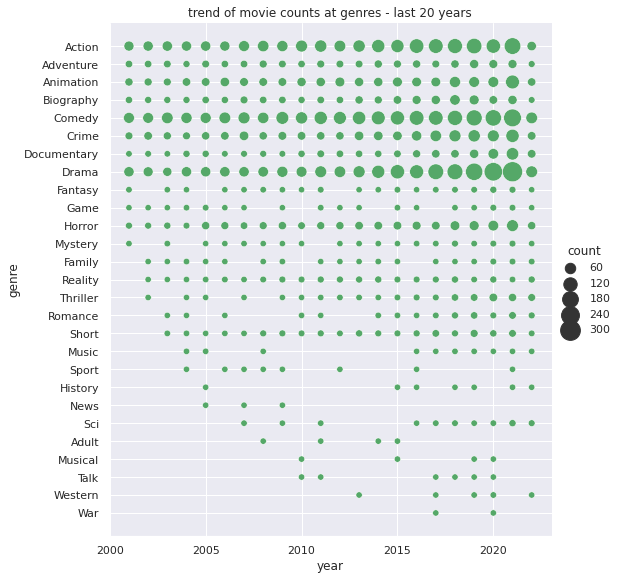

In [17]:
df = (df_imdb.groupby(['year', 'genre'], axis=0).count())[['title']]
df = df.reset_index()
df.rename(columns={'title': 'count'}, inplace=True)
df = df[df["year"]>2000]
sns.set_theme(style="darkgrid")
ax = sns.relplot(x="year", y="genre",  size="count",
            sizes=(40, 400), alpha=1, palette="Set1",
            height=8, data=df, color = 'g')
ax.set(title='trend of movie counts at genres - last 20 years')
#sns.set(rc = {'figure.figsize':(16,8)})
plt.show()

Obviously, the number of movies in some genres experienced significant climb during last 22 years. This trend is clearly noticeable at three genres: Action, Comedy and Drama. 

Text(0.5, 1.0, 'trend of movie counts at genres - last 20 years')

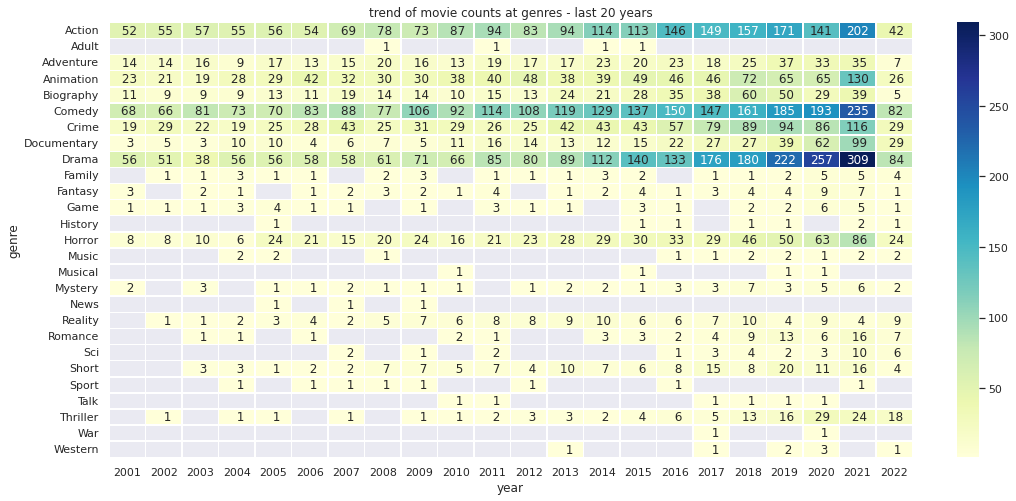

In [18]:
data = df_imdb[df_imdb["year"]>2000]
data = data.groupby(['genre', 'year']).size().unstack()
plt.figure(figsize=(16,8))
g = sns.heatmap(
    data, 
    square=False, 
    cbar_kws={'fraction' : 0.05}, # shrink colour bar
    cmap='YlGnBu', 
    linewidth=0.5, # space between cells
    fmt='3.0f',
    annot=True
)
plt.title('trend of movie counts at genres - last 20 years')
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
#g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

This heatmap is same as above figure. 

## other features
There are several other features in our data set such as color, country of origin, language, and sound mix.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


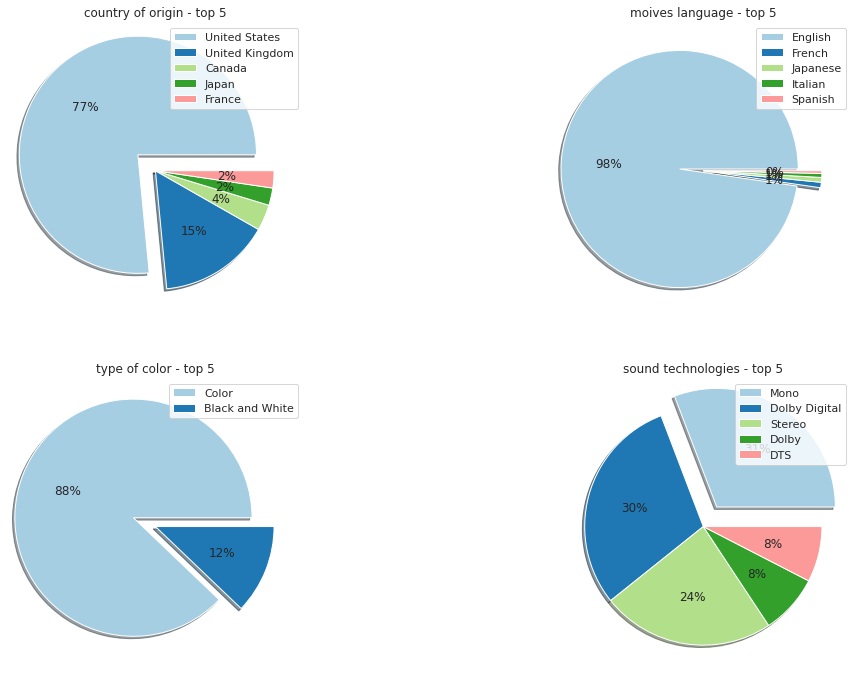

In [19]:
df_country = (df_imdb.groupby('country_of_origin', axis=0).count())[['title']]
df_country.nlargest(10, 'title')
df_language = (df_imdb.groupby('language', axis=0).count())[['title']]
df_language.nlargest(10, 'title')
df_color = (df_imdb.groupby('color', axis=0).count())[['title']]
df_color.nlargest(10, 'title')
df_sound_mix = (df_imdb.groupby('sound_mix', axis=0).count())[['title']]
df_sound_mix.nlargest(10, 'title')
ex = (0.2,0,0,0,0)

colors = sns.color_palette("Paired", 8)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.set_theme(style="white")
#ax = sns.barplot(x = df.index, y=df['title'], data=df, ax=axes[0])
#ax = sns.countplot(data=df_imdb, x='genre', palette='Set1', color=colors, ax=axes[0])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set(title='Number of movies of all genres', ylabel='# of movies')
axes[0,0].pie(df_country.nlargest(5, 'title'), colors = colors, autopct = '%0.0f%%', explode = ex, shadow=True)
axes[0,0].set(title='country of origin - top 5')
axes[0,0].legend(labels=(df_country.nlargest(5, 'title')).index, loc="best")

axes[0,1].pie(df_language.nlargest(5, 'title'), colors = colors, autopct = '%0.0f%%', explode = ex, shadow=True)
axes[0,1].set(title='moives language - top 5')
axes[0,1].legend(labels=(df_language.nlargest(5, 'title')).index, loc="best")

axes[1,0].pie(df_color.nlargest(5, 'title'), colors = colors, autopct = '%0.0f%%', explode = (0.2,0), shadow=True)
axes[1,0].set(title='type of color - top 5')
axes[1,0].legend(labels=(df_color.nlargest(5, 'title')).index, loc="best")

axes[1,1].pie(df_sound_mix.nlargest(5, 'title'), colors = colors, autopct = '%0.0f%%', explode = ex, shadow=True)
axes[1,1].set(title='sound technologies - top 5')
axes[1,1].legend(labels=(df_sound_mix.nlargest(5, 'title')).index, loc="best")
plt.show()

# Missing Values
Dealing with missing values is one of challenging parts of dataset preprocessing. In this section, we will consider the missing values in our data set and would like to know how many missing values exist in the data set and visualize it.  

In [20]:
# first and simplest way to know how many missing values we have in our data set!
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25293 entries, 0 to 25292
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               25293 non-null  object 
 1   title              25293 non-null  object 
 2   year               25293 non-null  int64  
 3   runtime            25273 non-null  float64
 4   genre              25293 non-null  object 
 5   globalRate         25293 non-null  float64
 6   text               25293 non-null  object 
 7   votes              25293 non-null  int64  
 8   stars              25285 non-null  object 
 9   creator            25285 non-null  object 
 10  story_line         20094 non-null  object 
 11  tag_line           16889 non-null  object 
 12  country_of_origin  7081 non-null   object 
 13  language           5612 non-null   object 
 14  color              10350 non-null  object 
 15  sound_mix          7019 non-null   object 
dtypes: float64(2), int64(2

Happily, amongst 10 features we can say there is no missing values or the share of missing values is nearly zero while 6 columns reflect rahter high percentage of missing values. They are story_line, tag_line, county_of_origin, language, color, and, sound_mix. It seems that these missing values are somehow systematic, that is we were not able to collect or grab these information from IMDB website through web scraping process. At least, the fact is more likely true regarding country_of_origin, language, color, and sound_mix.
It is visible that two columns of story_line and tag_line consist of relatively high number of missing values. 
As we have realized during web scraping process, several movies do not have tag line while many movies have had more than one tag line. Moreover, the website do not provide story line for some movies and intead of story line, IMDB puts a template sentence like 'It seems there is no story line for this movie'. We have gathered these sentences as well, however we had to remove them as preprocessing steps. 

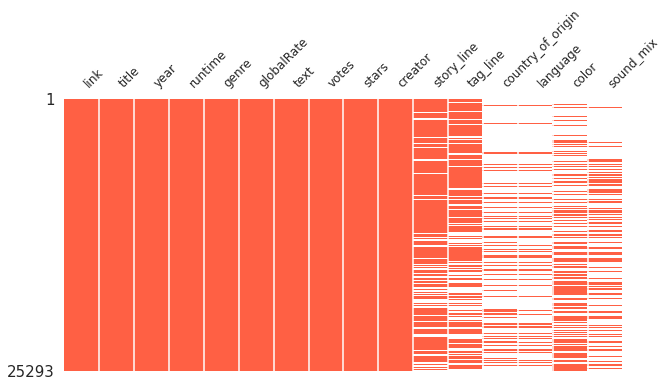

In [25]:
# missing values heatmap
msno.matrix(df_imdb,figsize=(10,5), sparkline=False, fontsize=12, color=(1, 0.38, 0.27))

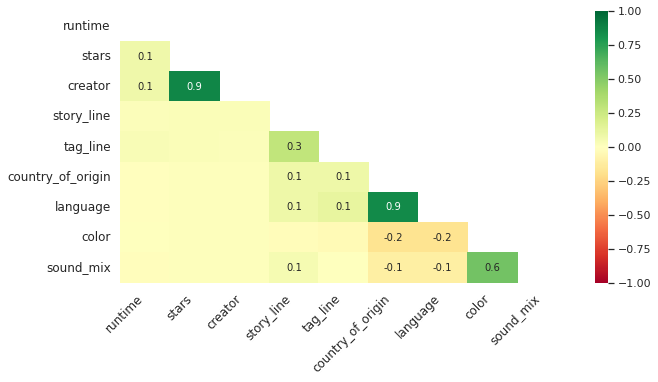

In [27]:
# correlation between missing values
msno.heatmap(df_imdb, cmap="RdYlGn", figsize=(10,5), fontsize=12)

At figure above, I plotted a correlation heatmap which is showing missing values correlation between columns that contain missing values.

We can notice from this heatmap that creator and stars reflect high correlation near 0.9. That means, if the value from one column (creator or stars) is missing then the value in another column will be missing as well. And the same thing goes for two columns of country_of_origin and language as well as color and sound_mix are somehow correlated to each other in terms of missing values which its exact correlation value is 0.6. Meanwhile, There are few other missing values correlations present in heatmap like story_line and tag_line, their correlation value is not so high about 0.3 however.